# Synthesis Decibels

Decibels are a common unit of relative measurement on a logarithmic scale. That part alone is fairly easy to understand, but let's generate a signal, analyze it with FFT, and see how close we are.


In [19]:
import warnings
warnings.filterwarnings('ignore')


## Tone Specification

Let's synthesize a tone with the following specifications:

- 2 kHz sinewave @ 0dB
- 4 kHz sinewave @ -10 dB
- 6 kHz sinewave @ -40 dB


In [20]:
tones = [(2000, 0), (4000, -10), (6000, -40)]


## Synthesis

In [21]:
import numpy as np
import IPython.display as ipd
import librosa

sr = 22050
T = 5.0
t = np.linspace(0, T, int(T * sr), endpoint=False)
x = 0

for freq, db in tones:
    x = x + librosa.db_to_amplitude(db) * np.sin(2*np.pi*freq*t)

ipd.Audio(x, rate=sr)


## Spectrogram


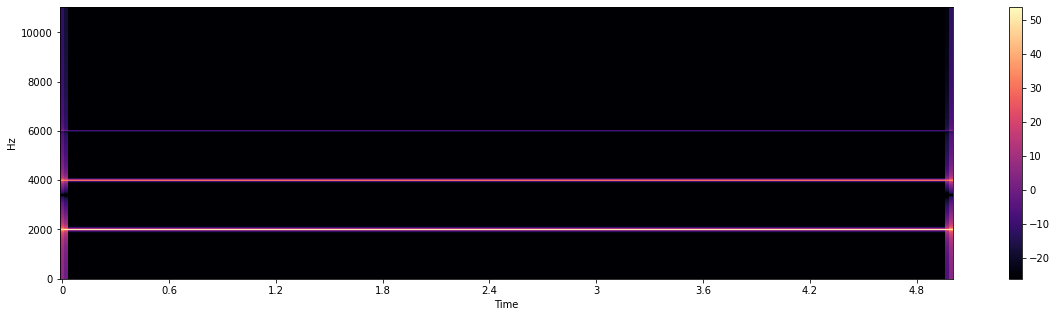

In [22]:
import matplotlib.pyplot as plt

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(X)

plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, x_axis='time', y_axis='hz', cmap="magma")
plt.colorbar()


## Spectrum Plot


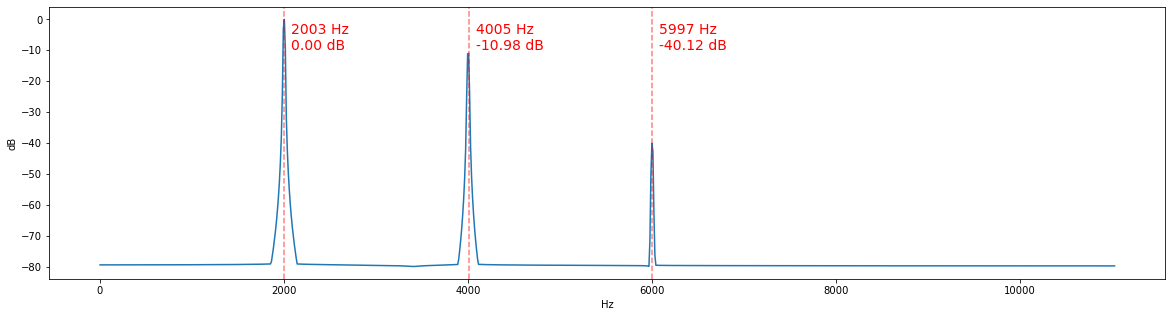

In [23]:
from scipy.signal import argrelextrema

# Average the frequency response over the entire duration
Xdb_mean = np.mean(Xdb, axis=1)
Xdb_mean = Xdb_mean - max(Xdb_mean)

frequencies = librosa.core.fft_frequencies(sr=sr)


# Plot average frequency amplitudes across window
plt.figure(figsize=(20, 5))
plt.plot(frequencies, Xdb_mean)
plt.xlabel('Hz')
plt.ylabel('dB')


# Plot local maxima
local_maxima = argrelextrema(Xdb_mean, np.greater, order=5)[0]
peaks = zip(frequencies[local_maxima], Xdb_mean[local_maxima])

for f, a in peaks:
    plt.axvline(x=f, color='r', alpha=0.5, linestyle='--')
    plt.text(x=f+75, y=max(Xdb_mean)-10,
             s=f"{round(f)} Hz\n{a:.2f} dB", color='r', size=14)
